In [1]:
# The new version of dataset is only available in the tfds-nightly package.
%pip --no-cache-dir install tensorflow-datasets --user
# DON'T MISS TO RESTART THE KERNEL

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Import TensorFlow 
import tensorflow as tf
import tensorflow_datasets as tfds
tfds.disable_progress_bar()
import tensorflow_hub as hub

print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.6.0
	• tf.keras version: 2.6.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
	• Running on GPU


Load the Dataset

Here you'll use tensorflow_datasets to load the Oxford Flowers 102 dataset. This dataset has 3 splits: 'train', 'test', and 'validation'. You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [4]:
# Download data to default local directory "~/tensorflow_datasets"
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums=True --datasets=oxford_flowers102

# TODO: Load the dataset with TensorFlow Datasets. Hint: use tfds.load()

dataset, dataset_info = tfds.load('oxford_flowers102', with_info=True, as_supervised=True)
#dataset, dataset_info = tfds.load('oxford_flowers102',split = 'train', as_supervised = True, with_info = True)
#dataset_info

# TODO: Create a training set, a validation set and a test set.
test_set, training_set, validation_set = dataset['test'], dataset['train'], dataset['validation']




2021-10-14 08:36:57.722184: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-14 08:36:57.759060: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-14 08:36:57.759956: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
I1014 08:36:57.760870 140187290392448 download_and_prepare.py:200] Running download_and_prepare for dataset(s):
oxford_flowers102
2021-10-14 08:36:57.765758: I tensorflow/core/platform/cloud/google_auth_provider.cc:180] Attempting an empty bearer token since no token was retrieved from files, and GCE metadata check was skipped.
2021-10-14

In [5]:
dataset_info

tfds.core.DatasetInfo(
    name='oxford_flowers102',
    version=2.1.1,
    description='The Oxford Flowers 102 dataset is a consistent of 102 flower categories commonly occurring
in the United Kingdom. Each class consists of between 40 and 258 images. The images have
large scale, pose and light variations. In addition, there are categories that have large
variations within the category and several very similar categories.

The dataset is divided into a training set, a validation set and a test set.
The training set and validation set each consist of 10 images per class (totalling 1020 images each).
The test set consists of the remaining 6149 images (minimum 20 per class).',
    homepage='https://www.robots.ox.ac.uk/~vgg/data/flowers/102/',
    features=FeaturesDict({
        'file_name': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=102),
    }),
    total_num_examples=8

 TODO: Get the number of examples in each set from the dataset info.


 TODO: Get the number of classes in the dataset from the dataset info.


In [6]:
                                  
#num_training_examples = dataset_info.splits['train'].num_examples
#print (num_training_examples)
#print('\nThere are {:,} images in the training set'.format(num_training_examples))num_classes = dataset_info.features['label'].num_classes

num_training_examples = dataset_info.splits['test'].num_examples
print('\nThere are {:,} images in the test set'.format(num_training_examples))

num_training_examples = dataset_info.splits['train'].num_examples
print('\nThere are {:,} images in the training set'.format(num_training_examples))

num_training_examples = dataset_info.splits['validation'].num_examples
print('\nThere are {:,} images in the validation set'.format(num_training_examples))

num_classes = dataset_info.features['label'].num_classes
print('\nThere are {:,} classes in our dataset'.format(num_classes))





There are 6,149 images in the test set

There are 1,020 images in the training set

There are 1,020 images in the validation set

There are 102 classes in our dataset


TODO: Print the shape and corresponding label of 3 images in the training set.

In [7]:

for image, label in training_set.take(3):
    print('The image in the training set have:')
    #print('\u2022 dtype:', image.dtype) 
    print('\u2022 shape:', image.shape)
    print('\u2022 label:', label.numpy())

The image in the training set have:
• shape: (500, 667, 3)
• label: 72
The image in the training set have:
• shape: (500, 666, 3)
• label: 84
The image in the training set have:
• shape: (670, 500, 3)
• label: 70


TODO: Plot 1 image from the training set. 

Set the title of the plot to the corresponding image label. 

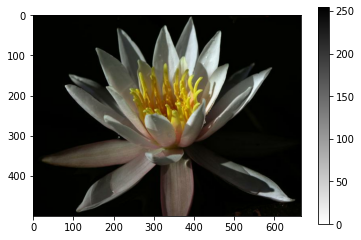

The label of this image is: 72


In [8]:
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()
    
# Plot the image
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.show()

print('The label of this image is:', label)

Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file label_map.json. It's a JSON object which you can read in with the json module. This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.



In [9]:
from google.colab import files
uploaded = files.upload()

Saving label_map.json to label_map.json


In [10]:
import json

with open('label_map.json','r') as f:
    class_names = json.load(f)

TODO: Plot 1 image from the training set. Set the title 
of the plot to the corresponding class name


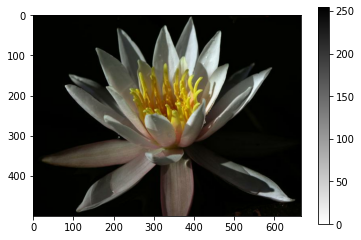

The label of this image is: 72
The class of this image is: azalea


In [11]:
for image, label in training_set.take(1):
    image = image.numpy().squeeze()
    label = label.numpy()
  
# Plot the image
plt.imshow(image, cmap = plt.cm.binary)
plt.colorbar()
plt.show()

print('The label of this image is:', label)

print('The class of this image is:', class_names [str(label)])


In [12]:
# check class name
print (class_names['72'])



azalea


Create Pipeline
TODO: Create a pipeline for each set.


In [13]:
# resize the image

def parse_image (image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [224, 224]) # resize 
    image = image/255
    return image, label

parsed = parse_image(image,label)

print (parsed)


(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.00392157, 0.00784314, 0.        ],
        [0.00392157, 0.00784314, 0.        ],
        [0.00392157, 0.00784314, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00784314, 0.        ],
        [0.00392157, 0.00784314, 0.        ],
        [0.00392157, 0.00784314, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       [[0.00392157, 0.00784314, 0.        ],
        [0.00392157, 0.00784314, 0.        ],
        [0.00392157, 0.00784314, 0.        ],
        ...,
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0. 

In [14]:
#Normalize the image data 
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, [224, 224]) # resize 
    image /= 255
    return image, label


#batch size
batch_size = 30

##NG batch code
#training_batches = training_set.cache().shuffle(num_training_examples//4).batch(batch_size).map(normalize)
#testing_batches = test_set.cache().batch(batch_size).map(normalize)

## Good batch code
training_batches = training_set.shuffle(num_training_examples//4).map(normalize).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(normalize).batch(batch_size).prefetch(1)
testing_batches = test_set.map(normalize).batch(batch_size).prefetch(1)


In [15]:
## check training set
print(training_set)

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


In [16]:
# check the training batch
print(training_batches)

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>


In [17]:
for image_batch, label_batch in training_batches.take(1):
    print('The images in each batch have:')
    print('\u2022 dtype:', image_batch.dtype) 
    print('\u2022 shape:', image_batch.shape)
  
    print('\nThere are a total of {} image labels in this batch:'.format(label_batch.numpy().size))
    print(label_batch.numpy())

The images in each batch have:
• dtype: <dtype: 'float32'>
• shape: (30, 224, 224, 3)

There are a total of 30 image labels in this batch:
[11  7 28 53  3 41 39 50 69 29 42 23 22 94 47  3 77 56 92 87 42 41 87 54
 57 25 90 91 43 15]


TODO: Build and train your network.
* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

In [18]:
# TODO: Save your trained model as a Keras model.
image_size = 224

URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL, input_shape=(image_size, image_size,3))

In [19]:
feature_extractor.trainable = False

In [20]:
# TODO: Load the Keras model
model = tf.keras.Sequential([
        feature_extractor,
        tf.keras.layers.Dense(102, activation = 'softmax')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 102)               130662    
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


In [21]:


# Train the model using a GPU
# Enable GPU first
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

	• Running on GPU


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
EPOCHS = 5

# Stop training when there is no improvement in the validation loss for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


#history = model.fit(training_batches, epochs = EPOCHS)
history = model.fit(training_batches,
                    epochs = EPOCHS,
                    validation_data=validation_batches,
                    callbacks=[early_stopping]
                    )


Epoch 1/5
34/34 [==============================] - 41s 233ms/step - loss: 4.2613 - accuracy: 0.1029 - val_loss: 3.0672 - val_accuracy: 0.3706
Epoch 2/5
34/34 [==============================] - 8s 222ms/step - loss: 2.0152 - accuracy: 0.7275 - val_loss: 1.9782 - val_accuracy: 0.6480
Epoch 3/5
34/34 [==============================] - 8s 226ms/step - loss: 1.0454 - accuracy: 0.9059 - val_loss: 1.5070 - val_accuracy: 0.7382
Epoch 4/5
34/34 [==============================] - 8s 225ms/step - loss: 0.6272 - accuracy: 0.9647 - val_loss: 1.2770 - val_accuracy: 0.7794
Epoch 5/5
34/34 [==============================] - 8s 224ms/step - loss: 0.4182 - accuracy: 0.9824 - val_loss: 1.1518 - val_accuracy: 0.7873


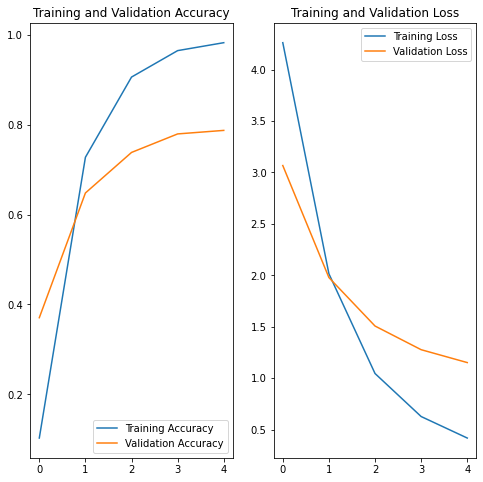

In [23]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(len(training_accuracy))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Evaluate Loss and Accuracy on the Test set

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [24]:
loss, accuracy = model.evaluate(testing_batches)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.3%}'.format(accuracy))

205/205 [==============================] - 25s 119ms/step - loss: 1.2688 - accuracy: 0.7437

Loss on the TEST Set: 1.269
Accuracy on the TEST Set: 74.370%


In [45]:
# TODO: Save your trained model as a Keras model.

#from google.colab import drive
#drive.mount('/test_images')

#project_folder_path = "/test_images/MyDrive/Colab Notebooks/Udacity_Intro_to_Tensorflow/Project_2_image_classifier/"

from google.colab import files

import time

timestamp = time.time()

saved_model_path = './{}.h5'.format(int(timestamp))

saved = model.save(saved_model_path)

print (saved)

files.download(str(saved_model_path))




None


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
# TODO: Load the Keras model
# Shape and paramters are checkd and same as model 

loaded_model = tf.keras.models.load_model(saved_model_path, custom_objects={'KerasLayer':hub.KerasLayer})

loaded_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 102)               130662    
Total params: 2,388,646
Trainable params: 130,662
Non-trainable params: 2,257,984
_________________________________________________________________


Inference for Classification

The process_image function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape (224, 224, 3).

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using tf.image.resize.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values.

Finally, convert your image back to a NumPy array using the .numpy() method.


In [38]:
# TODO: Create the process_image function

def process_image(image):
  processing_image = tf.convert_to_tensor (image, dtype=tf.float32)
  processing_image = tf.image.resize(processing_image, (image_size, image_size))
  processing_image /= 255
  return processing_image.numpy()

In [33]:
#  prompt to upload 'orange dahlia' file
from google.colab import files
files.upload()  

Saving orange_dahlia.jpg to orange_dahlia.jpg


{'orange_dahlia.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x02\xf0\x01\xf4\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc

To check your process_image function we have provided 4 images in the ./test_images/ folder:

cautleya_spicata.jpg
hard-leaved_pocket_orchid.jpg
orange_dahlia.jpg
wild_pansy.jpg
The code below loads one of the above images using PIL and plots the original image alongside the image produced by your process_image function. If your process_image function works, the plotted image should be the correct size.

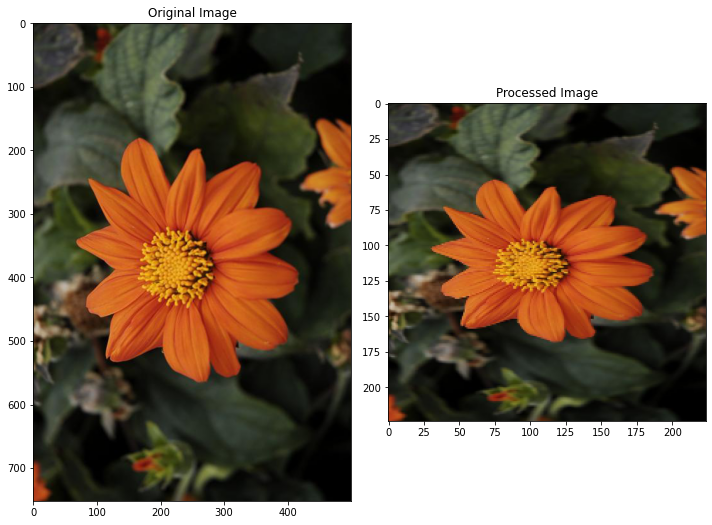

In [39]:
from PIL import Image


im = Image.open("orange_dahlia.jpg")
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Inference

Inference
Remember, the predict function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like:

probs, classes = predict(image_path, model, top_k)
If top_k=5 the output of the predict function should be something like this:

probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
Your predict function should use PIL to load the image from the given image_path. You can use the Image.open function to load the images. The Image.open() function returns an Image object. You can convert this Image object to a NumPy array by using the np.asarray() function.

Note: The image returned by the process_image function is a NumPy array with shape (224, 224, 3) but the model expects the input images to be of shape (1, 224, 224, 3). This extra dimension represents the batch size. We suggest you use the np.expand_dims() function to add the extra dimension.

In [40]:

 #TODO: Create the predict function
from PIL import Image


im = Image.open("orange_dahlia.jpg")
test_image = np.asarray(im)


def predict(image_path, model, top_k):
    array = test_image
    processing_image = process_image(array)
    processing_image_batch = np.expand_dims(processing_image, axis=0)
    prediction_result = model.predict(processing_image_batch)
    probs, classes = tf.math.top_k(prediction_result,top_k)
    probs = probs.numpy().squeeze()
    classes = classes.numpy().squeeze()
    classes = [str(value) for value in classes]
    return probs, classes

predict(im, loaded_model, 5)


(array([0.31448933, 0.10196801, 0.09305611, 0.07638624, 0.0482533 ],
       dtype=float32), ['58', '4', '70', '65', '99'])



Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the ./test_images/ folder:

cautleya_spicata.jpg
hard-leaved_pocket_orchid.jpg
orange_dahlia.jpg
wild_pansy.jpg

In the cell below use matplotlib to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

In [41]:
#mount google drive folder consisting of test images
from google.colab import drive
drive.mount('/test_images')

Mounted at /test_images


In [42]:
#check the images in the mounter drive
!ls "/test_images/MyDrive/Colab Notebooks/Udacity_Intro_to_Tensorflow/Project_2_image_classifier/test_images"

cautleya_spicata.jpg	       orange_dahlia.jpg
hard-leaved_pocket_orchid.jpg  wild_pansy.jpg


In [43]:
#evaluation_batches = "/test_images/MyDrive/Colab Notebooks/Udacity_Intro_to_Tensorflow/Project_2_image_classifier/test_images"



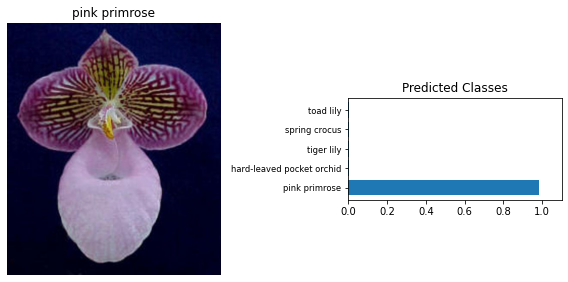

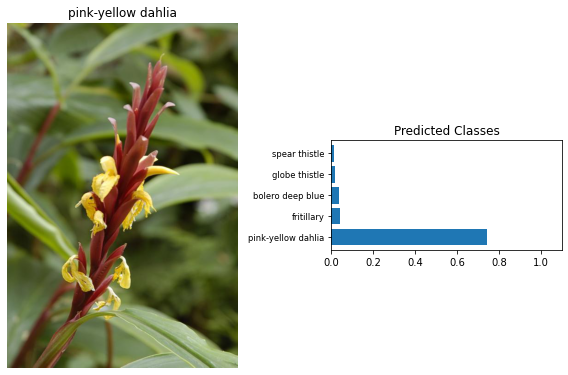

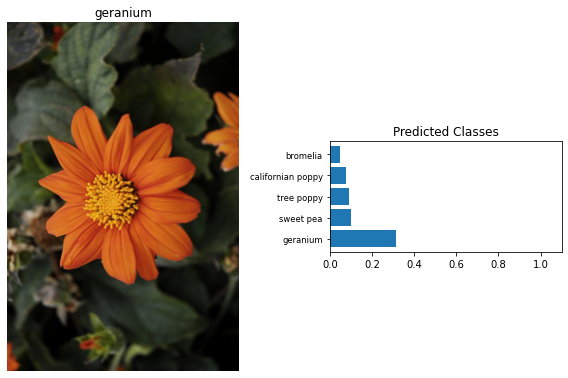

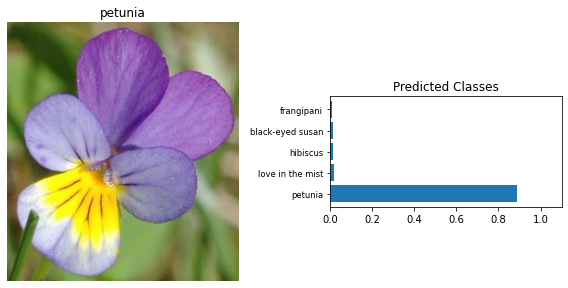

In [44]:
# TODO: Plot the input image along with the top 5 classes

import os

test_images_path = "/test_images/MyDrive/Colab Notebooks/Udacity_Intro_to_Tensorflow/Project_2_image_classifier/test_images"


def get_class_names (labels):
  search_class_names = []
  
  for label in labels:
    search_class_names.append(class_names[label])
  return search_class_names


def plot_top_classes(image, top_predictions, top_labels):
  fig, (ax1, ax2) = plt.subplots(figsize=(8,10), ncols=2)
  ax1.imshow(image, cmap=plt.cm.binary)
  ax1.axis('off')
  ax1.set_title(class_names[top_labels[0]])

  search_class_names = get_class_names(top_labels)

  ax2.barh(np.arange(5), top_predictions)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(5))
  ax2.set_yticklabels(search_class_names, size='small')
  ax2.set_title('Predicted Classes')
  ax2.set_xlim(0, 1.1)
  plt.tight_layout()

for filename in os.listdir(test_images_path):
  image_path = '{}/{}'.format(test_images_path, filename)

  im = Image.open(image_path)
  test_image = np.asarray(im)

  top_prob, top_labels = predict(image_path, model, 5)
  plot_top_classes(test_image, top_prob, top_labels)